# Notebook 14
**Course:** *Econ 590, Computational Methods for Economists*, [University of North Carolina at Chapel Hill](https://econ.unc.edu/), Spring 2025  
**Instructor:** [Marlon Azinovic-Yang](https://sites.google.com/view/marlonazinovic/home)  
**Contact:** marlonay@unc.edu  
**References:** This notebook has benefited greatly from the teaching material and notebooks generously made available by [Simon Scheidegger](https://sites.google.com/site/simonscheidegger/home), [Felix Kubler](https://sites.google.com/site/fkubler/), [Harold Linh Cole](https://economics.sas.upenn.edu/people/harold-l-cole), [Jeremy Greenwood](https://www.jeremygreenwood.net/), [Jeppe Druedahl](https://sites.google.com/view/jeppe-druedahl/), [Rick Evans](https://sites.google.com/site/rickecon/), and by [Tom Sargent](http://www.tomsargent.com/) and [John Stachurski](https://johnstachurski.net/) on [QuantEcon](https://quantecon.org/).

## Content
In this notebook we introduce gradient descent as well as stochastic gradient descent. We will implement it using the `jax` library.

In [ ]:
!pip install -U jax

In [ ]:
# Gradient Descent for Linear Regression in JAX
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import numpy as np


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 MB 2.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.4/670.4 kB 3.0 MB/s eta 0:00:00


### Exercise 1
In this exercise we want to program a function $L(\boldsymbol \theta) = (\theta_0 - 1) ^ 2 + (\theta_1 - 2) ^ 2$ and find the parameters $\boldsymbol \theta$ that minimize $L(\boldsymbol \theta)$ using gradient descent.

In [4]:
def L(theta):
    # solution here
    loss = (theta[0] - 1) ** 2 + (theta[1] - 2) ** 2

    return loss

theta = jnp.array([0.0, 0.0])
print(L(theta))
print(L(jnp.array([1.0,1.0])))

5.0
1.0


In [5]:
# solution here
def gradL(theta):
    # solution here
    grad_loss = jax.grad(L, argnums = 0)(theta)

    return grad_loss

theta = jnp.array([0.0, 0.0])
print(gradL(theta))

[-2. -4.]


In [6]:
def gradient_descent(theta, alpha, num_steps, tolerance=1e-4):

    Losshistory = np.zeros(num_steps)
    # solution here
    for i in range(num_steps):
        Loss = L(theta)
        Losshistory[i] = Loss
        grad = gradL(theta)

        thetanew = theta - alpha * grad

        theta = thetanew

    return thetanew, Losshistory

theta = jnp.array([0.0, 0.0])
alpha = 0.1
num_steps = 100
theta, Losshistory = gradient_descent(theta, alpha, num_steps)
print(theta)

[0.9999999 1.9999998]


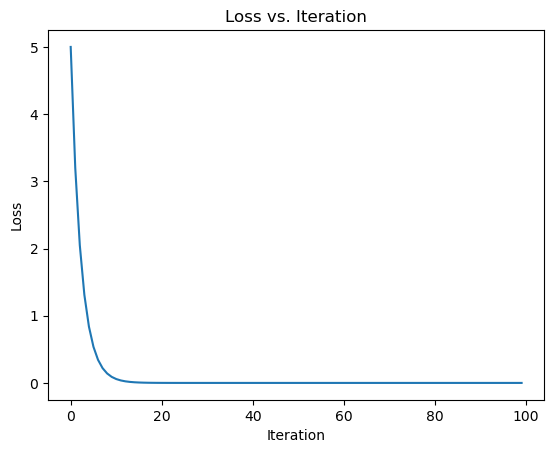

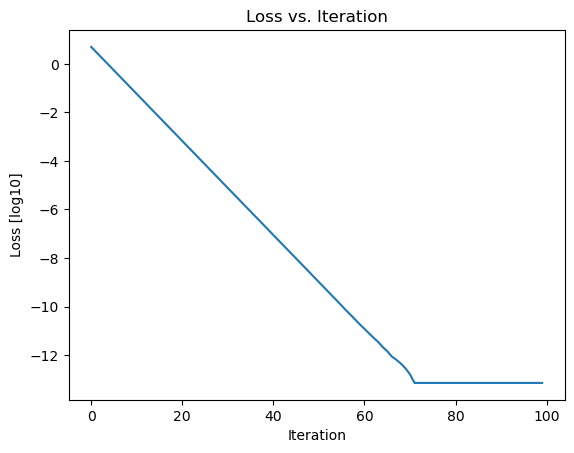

In [7]:
plt.plot(Losshistory)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration')
plt.show()

plt.plot(np.log10(Losshistory))
plt.xlabel('Iteration')
plt.ylabel('Loss [log10]')
plt.title('Loss vs. Iteration')
plt.show()

### Exercise 2
We want to use gradient descent to fit data $(x_i, y_i)$ with a model $f_{\boldsymbol \theta}(x) = \theta_0 x + \theta_1$.  
To start we generate artificial training data by sampling `n` values of `x` uniformly random between -2 and 2. The we generate the corresponding label using $y_i = w x_i + b + \epsilon_i$, where $w = 2$, $b = 1$ and $\epsilon_i \sim \mathcal{N}(0, 1)$.

In [8]:
# solution here
# Generate synthetic data
def generate_data(n=100, true_w=2.0, true_b=1.0, noise_std=0.5):
    """
    Generate synthetic linear data with noise. This function creates
    a dataset of n samples where the true relationship is y = w * x + b
    with added Gaussian noise.
    
    Parameters:
    n: int, number of samples
    true_w: float, true weight (slope) of the linear relationship
    true_b: float, true bias (intercept) of the linear relationship
    noise_std: float, standard deviation of the Gaussian noise
    
    Returns:
    x: numpy array of floats, size (n,), input features (independent variable)
    y: numpy array of floats, size (n,), output labels (dependent variable)
    """
    x = np.random.uniform(-2, 2, n)
    noise = np.random.normal(0, noise_std, n)
    y = true_w * x + true_b + noise
    return x, y

In [9]:
# set the values
true_w = 2.0
true_b = 1.0
true_theta = np.array([true_w, true_b])
noise_std = 1.0
n = 100

# generate the data
x_data, y_data = generate_data(n, true_w, true_b, noise_std)


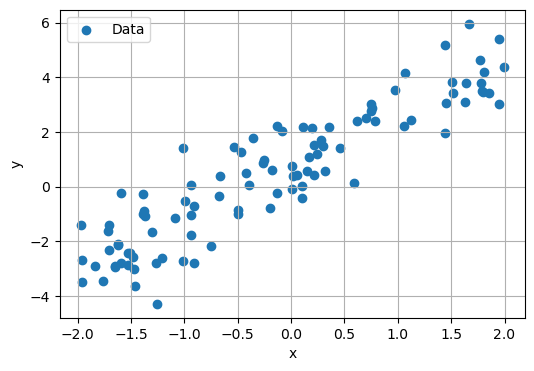

In [10]:

# Plot the data
plt.figure(figsize=(6,4))
plt.scatter(x_data, y_data, label="Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

Let's say we want to describe the data by finding parameters $w$ and $b$ such that $y = w x + b$. 

#### Model
Now, let's see if we could also find the $w$ and $b$ using gradient descent. We specify a model `model(theta, x)`, where `theta = [w, b]`. Given model parameters $\boldsymbol\theta$, the model predicts $y$ according to $y = \theta_0 x + \theta_1$.

In [ ]:
# Define the model 
def model(theta, x):
    # solution here

    return y

#### Loss function
Before we can implement gradient descent, we have define a loss function $L(\boldsymbol \theta)$ that tells us whether the parameters $\boldsymbol \theta$ are good or bad.


In [ ]:

# define the loss function
def mse_loss(theta, x, y):
    # solution here

    return mse

#### Gradient
Next we need to get a function that computes the gradient of the loss function with respect to the parameters $\boldsymbol \theta$. We do this using automatic differentiation and the function `jax.grad`.

In [ ]:
# Compute gradients

# solution here

#### Training loop
Now we have all the parts ready to implement gradient descent. To do so we need to choose a learning rate `lr` and the number of `epochs` that tells us how often we want to go through the data set. We also want to keep track of the loss and the parameter values during training.

In [ ]:
# Gradient descent loop
def train(x, y, lr=0.1, epochs=50):
    # Initialize parameters
    theta = np.array([0.0, 0.0])

    # Store loss and parameter history for plotting
    loss_history = []
    theta_history = []
    w_history = []
    b_history = []
    
    # solution here
            
    return thetanew, w, b, loss_history, w_history, b_history, theta_history



In [13]:
# Train the model
theta_hat, w_hat, b_hat, history, w_history, b_history, theta_history = train(x_data, y_data)


Epoch   0: Loss = 8.6824, w = 0.6365, b = 0.2220
Epoch  10: Loss = 0.9588, w = 2.0536, b = 0.9131
Epoch  20: Loss = 0.9470, w = 2.0883, b = 0.9739
Epoch  30: Loss = 0.9469, w = 2.0887, b = 0.9802
Epoch  40: Loss = 0.9469, w = 2.0886, b = 0.9809


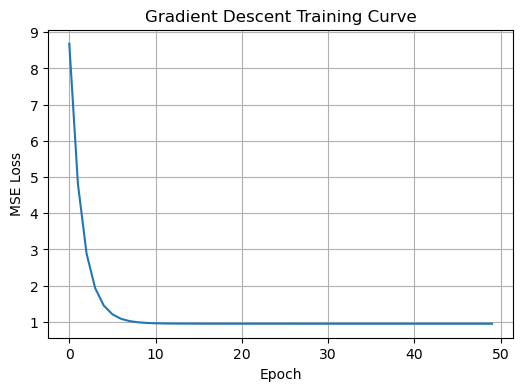

In [14]:

# Plot the loss curve
plt.figure(figsize=(6,4))
plt.plot(history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Gradient Descent Training Curve")
plt.grid(True)
plt.show()


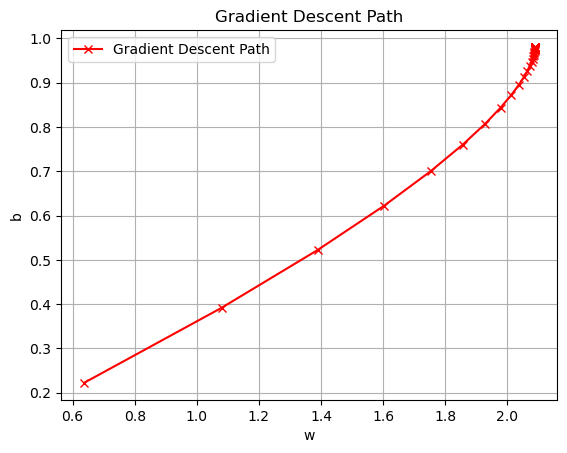

In [15]:

plt.plot(w_history, b_history, "x-", color = "red", label="Gradient Descent Path")
plt.xlabel("w")
plt.ylabel("b")
plt.title("Gradient Descent Path")
plt.legend()
plt.grid(True)
plt.show()

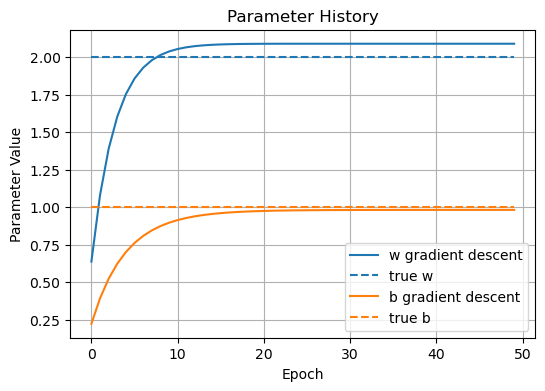

In [16]:

# PLot the w history
plt.figure(figsize=(6,4))
plt.plot(w_history, color = "C0", label="w gradient descent")
plt.plot(np.ones_like(w_history) * true_w, ls = "--", color = "C0", label="true w")
plt.plot(b_history, color = "C1", label="b gradient descent")
plt.plot(np.ones_like(b_history) * true_b, ls = "--", color = "C1", label="true b")
plt.xlabel("Epoch")
plt.ylabel("Parameter Value")
plt.title("Parameter History")
plt.legend(loc = "lower right")
plt.grid(True)
plt.show()


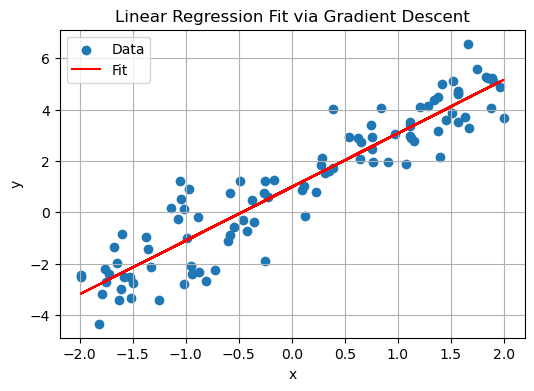

In [17]:

# Plot regression line
plt.figure(figsize=(6,4))
plt.scatter(x_data, y_data, label="Data")
plt.plot(x_data, w_hat * x_data + b_hat, color='red', label="Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Fit via Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()


### Exercise 3
Now we want to implement the training loop for stochastic gradient descent. This means, we want to be able to choose a minibatch size `n_minibatch` that tells us how many datapoints should be used for each gradient descent step.

In [ ]:
# Gradient descent loop
def train_minibatch(x, y, n_minibatch =  16, lr=0.1, epochs=50):
    # Initialize parameters
    theta = np.array([0.0, 0.0])

    # Store loss and parameter history for plotting
    loss_history = []
    theta_history = []
    w_history = []
    b_history = []
    
    # solution here
            
    return thetanew, w, b, loss_history, w_history, b_history, theta_history



In [19]:
# Train the model
theta_hat, w_hat, b_hat, history, w_history, b_history, theta_history = train_minibatch(x_data, y_data, n_minibatch = 32)


Epoch   0: Loss = 14.1021, w = 0.8480, b = 0.6507
Epoch  10: Loss = 0.1077, w = 2.1304, b = 0.9601
Epoch  20: Loss = 1.7856, w = 2.2304, b = 0.9130
Epoch  30: Loss = 0.3810, w = 2.2318, b = 1.0300
Epoch  40: Loss = 0.3551, w = 2.0769, b = 1.4971


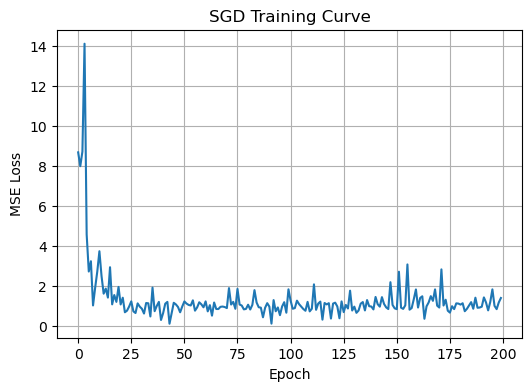

In [20]:

# Plot the loss curve
plt.figure(figsize=(6,4))
plt.plot(history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("SGD Training Curve")
plt.grid(True)
plt.show()


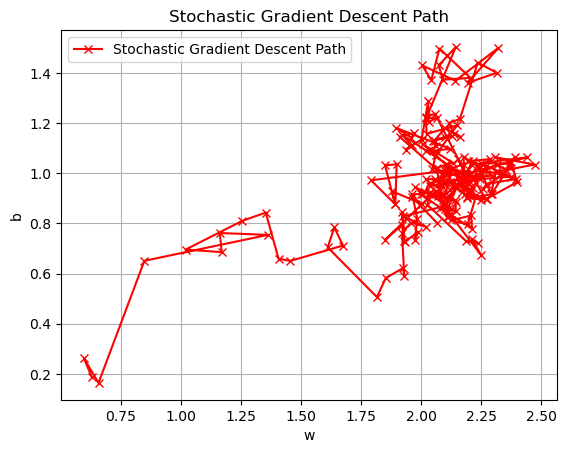

In [21]:

plt.plot(w_history, b_history, "x-", color = "red", label="Stochastic Gradient Descent Path")
plt.xlabel("w")
plt.ylabel("b")
plt.title("Stochastic Gradient Descent Path")
plt.legend()
plt.grid(True)
plt.show()

### Boston houseprice data

In [22]:
!pip install kagglehub

/home/marlon/anaconda3/lib/python3.9/pty.py:85: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [23]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("grandeurkoe/boston-house-price-data")

print("Path to dataset files:", path)

import pandas as pd
# Load the dataset
data = pd.read_csv(path + "/boston.csv")
print(data.head())


Path to dataset files: /home/marlon/.cache/kagglehub/datasets/grandeurkoe/boston-house-price-data/versions/1
   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO       B  LSTAT  PRICE  
0  296.0     15.3  396.90   4.98   24.0  
1  242.0     17.8  396.90   9.14   21.6  
2  242.0     17.8  392.83   4.03   34.7  
3  222.0     18.7  394.63   2.94   33.4  
4  222.0     18.7  396.90   5.33   36.2  


In [24]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  PRICE       506 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB
None


In [25]:
ydata = data["PRICE"].values
xdata1 = data["AGE"].values
xdata2 = data["RM"].values

xdata = np.column_stack((xdata1, xdata2))

print(xdata.shape)
print(ydata.shape)

# normalze the data
xdata = (xdata - np.mean(xdata, axis=0)) / np.std(xdata, axis=0)
ydata = (ydata - np.mean(ydata)) / np.std(ydata)

(506, 2)
(506,)


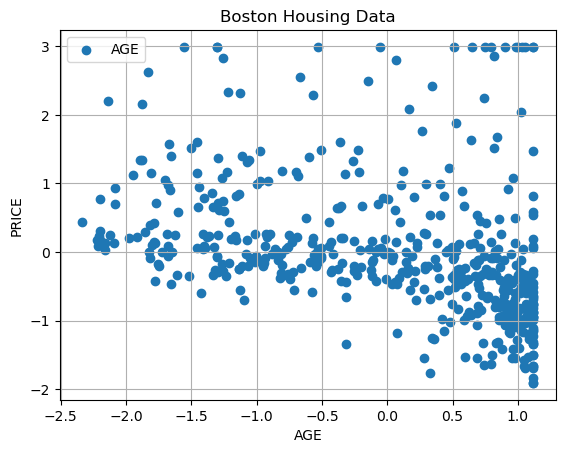

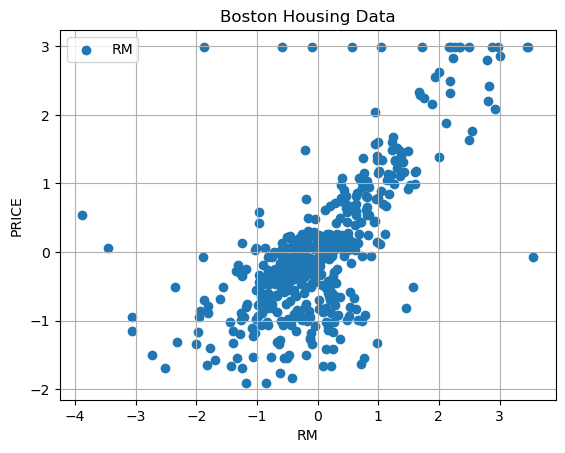

In [26]:
plt.scatter(xdata[:, 0], ydata, label="AGE")
plt.xlabel("AGE")
plt.ylabel("PRICE")
plt.title("Boston Housing Data")
plt.legend()
plt.grid(True)
plt.show()

plt.scatter(xdata[:, 1], ydata, label="RM")
plt.xlabel("RM")
plt.ylabel("PRICE")
plt.title("Boston Housing Data")
plt.legend()
plt.grid(True)
plt.show()

Write and train a model to predict house prices from the age and the number of rooms. Whoever get's the lowest mean squared error wins.

In [27]:
# Define the model 
def model(theta, x):

    y = theta[0] * x[:, 0] + theta[1] * x[:, 0] ** 2 + theta[2] * x[:, 1] + theta[3] * x[:, 1] ** 2 

    return y

In [28]:
def mse_loss(theta, x, y):
    # compute the prediciton given the parameters and the inputs x
    y_pred = model(theta, x)

    # compute the prediction error
    error = y - y_pred

    # compute the mean squared error
    # we need to use jnp.mean instead of np.mean to work with JAX
    mse = jnp.mean(error ** 2)

    return mse
# Compute gradients
grad_loss = jax.grad(mse_loss, argnums=(0))

#  Stochastic gradient descent loop
def train_minibatch(x, y, n_minibatch =  16, lr=0.1, epochs=50):
    # Initialize parameters
    theta = np.array([0.0, 0.0, 0.0, 0.0])

    # Store loss and parameter history for plotting
    loss_history = []
    theta_history = []
    
    # Gradient descent
    for epoch in range(epochs):

        # get total number of data points
        n_data = np.shape(x)[0]

        # shuffle the data
        indices = np.arange(n_data)
        np.random.shuffle(indices)
        x_shuffled= x[indices, :]
        y_shuffled = y[indices]

        # loop over the data in minibatches
        for i in range(0, n_data, n_minibatch):
            # get the minibatch
            x_mini = x_shuffled[i:i+n_minibatch]
            y_mini = y_shuffled[i:i+n_minibatch]

        

            # Compute gradients of the loss with respect to theta using the minibatches
            gradient = grad_loss(theta, x_mini, y_mini)

            # Update parameters
            thetanew = theta - lr * gradient
            
            # Store parameters for plotting
            theta_history.append(thetanew)

            # Compute and store loss
            loss = mse_loss(theta, x_mini, y_mini)

            loss_history.append(loss)

        # Print progress every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch:3d}: Loss = {loss:.4f}, theta = {thetanew}")

        theta = thetanew
            
    return thetanew, loss_history, theta_history



In [29]:
thetanew, loss_history, theta_history = train_minibatch(xdata, ydata, epochs = 400, n_minibatch = 200, lr = 0.01)

Epoch   0: Loss = 1.0624, theta = [-0.00717794  0.00184995  0.01101518  0.00537498]
Epoch  10: Loss = 0.8552, theta = [-0.06693933  0.00209379  0.12307702  0.09919959]
Epoch  20: Loss = 0.4640, theta = [-0.12495071 -0.00969252  0.2165181   0.13476713]
Epoch  30: Loss = 0.2969, theta = [-0.16283308 -0.01999822  0.28001887  0.14341661]
Epoch  40: Loss = 0.4228, theta = [-0.19254628 -0.0319224   0.33578408  0.14856279]
Epoch  50: Loss = 0.4794, theta = [-0.21704076 -0.0462197   0.3794429   0.14661574]
Epoch  60: Loss = 0.4185, theta = [-0.24334909 -0.05447272  0.4190478   0.14269944]
Epoch  70: Loss = 0.2809, theta = [-0.2530582  -0.06434951  0.45190045  0.16122131]
Epoch  80: Loss = 0.2251, theta = [-0.26858407 -0.07340066  0.47819862  0.14363626]
Epoch  90: Loss = 0.4369, theta = [-0.2838     -0.07898995  0.49729177  0.15402122]
Epoch 100: Loss = 0.6130, theta = [-0.29426953 -0.0845055   0.51046914  0.14607926]
Epoch 110: Loss = 0.3965, theta = [-0.30079108 -0.09485912  0.521974    0.13

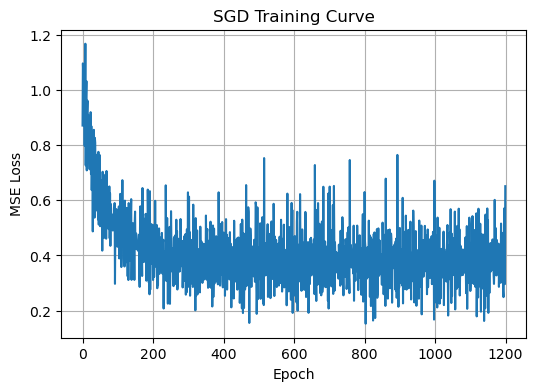

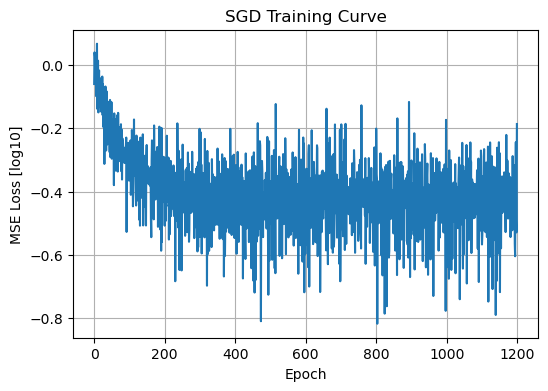

In [30]:
# Plot the loss curve
plt.figure(figsize=(6,4))
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("SGD Training Curve")
plt.grid(True)
plt.show()

# Plot the loss curve
plt.figure(figsize=(6,4))
plt.plot(np.log10(loss_history))
plt.xlabel("Epoch")
plt.ylabel("MSE Loss [log10]")
plt.title("SGD Training Curve")
plt.grid(True)
plt.show()


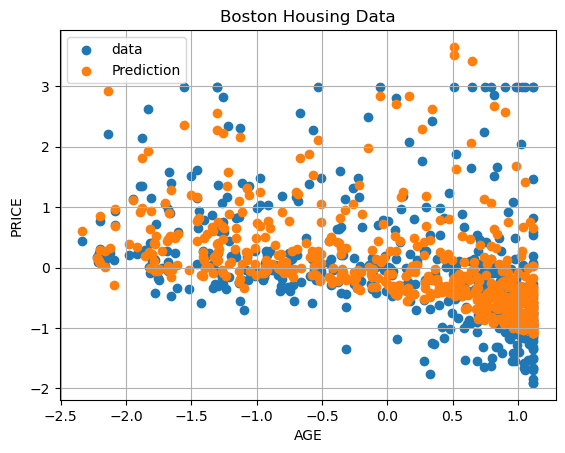

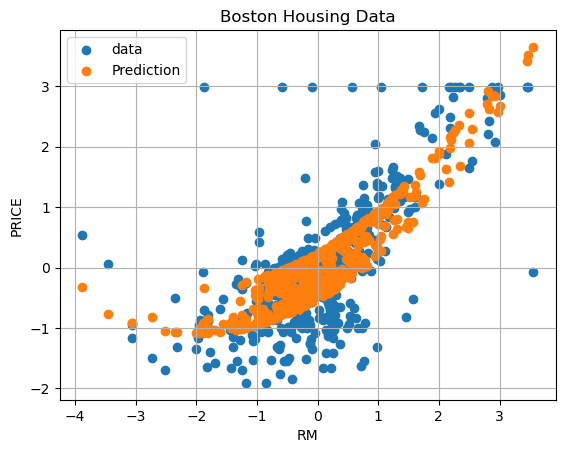

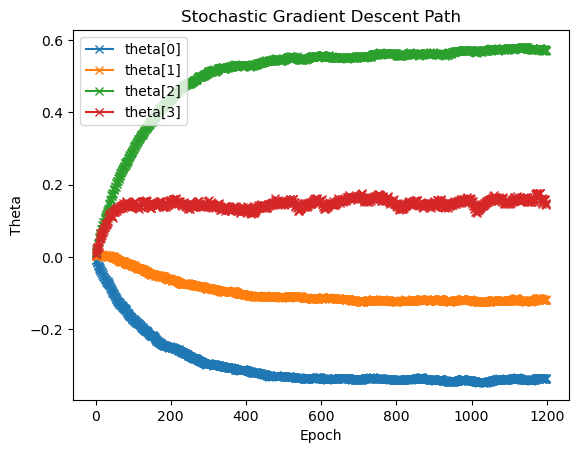

In [33]:
y_pred = model(thetanew, xdata)

pred_error = ydata - y_pred


plt.scatter(xdata[:, 0], ydata, label="data")
plt.scatter(xdata[:, 0], y_pred, label="Prediction")
plt.xlabel("AGE")
plt.ylabel("PRICE")
plt.title("Boston Housing Data")
plt.legend()
plt.grid(True)
plt.show()

plt.scatter(xdata[:, 1], ydata, label="data")
plt.scatter(xdata[:, 1], y_pred, label="Prediction")
plt.xlabel("RM")
plt.ylabel("PRICE")
plt.title("Boston Housing Data")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(np.array(theta_history)[:, 0], "x-", label="theta[0]")
plt.plot(np.array(theta_history)[:, 1], "x-", label="theta[1]")
plt.plot(np.array(theta_history)[:, 2], "x-", label="theta[2]")
plt.plot(np.array(theta_history)[:, 3], "x-", label="theta[3]")

plt.xlabel("Epoch")
plt.ylabel("Theta")
plt.title("Stochastic Gradient Descent Path")
plt.legend()
plt.show()
